In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("world-happiness-report-2021.csv")

df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
print("Bentuk data:", df.shape)
print("\nNama kolom:")
print(df.columns.tolist())
print("\nMissing values:")
print(df.isnull().sum())

Bentuk data: (149, 20)

Nama kolom:
['Country name', 'Regional indicator', 'Ladder score', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']

Missing values:
Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expecta

## 📊 Top 10 vs Bottom 10 Happiest Countries

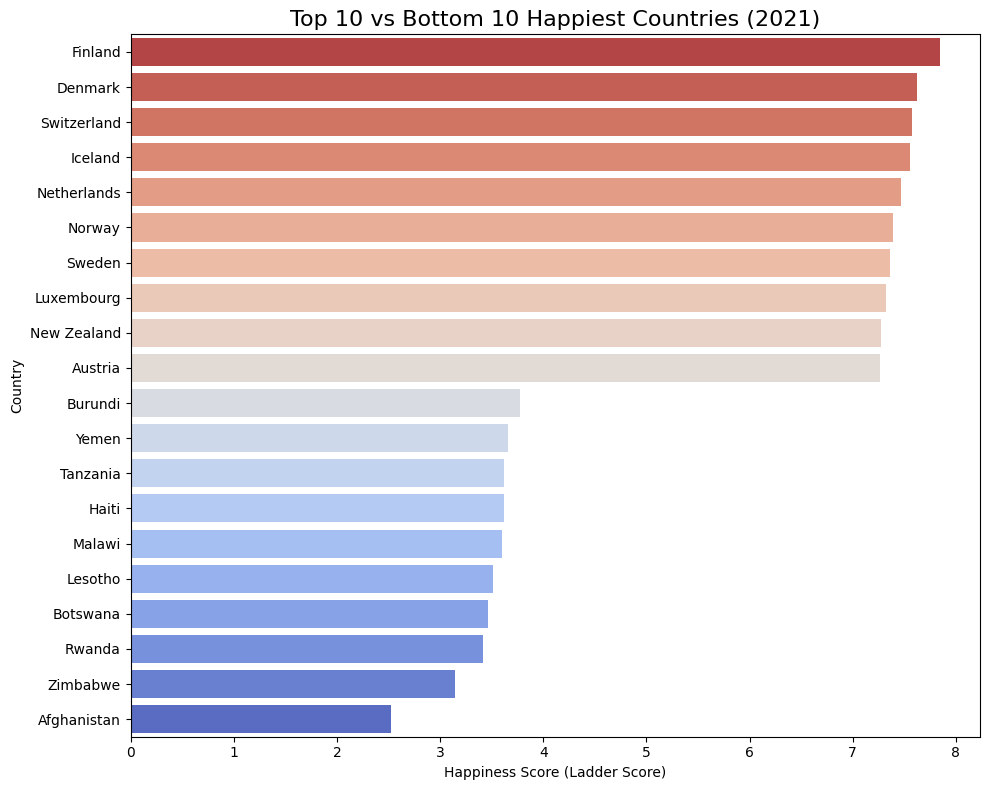

In [6]:
df_sorted = df.sort_values('Ladder score', ascending=False)

# Ambil top 10 dan bottom 10
top10 = df_sorted.head(10)
bottom10 = df_sorted.tail(10)

# Gabungkan untuk plot
plot_data = pd.concat([top10, bottom10])

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=plot_data, x='Ladder score', y='Country name', 
            hue='Country name', dodge=False, legend=False, palette='coolwarm_r')
plt.title('Top 10 vs Bottom 10 Happiest Countries (2021)', fontsize=16)
plt.xlabel('Happiness Score (Ladder Score)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

> Finlandia konsisten di puncak sejak 2018, sementara Afghanistan berada di posisi terbawah.

## 🌍 Average Happiness by Region

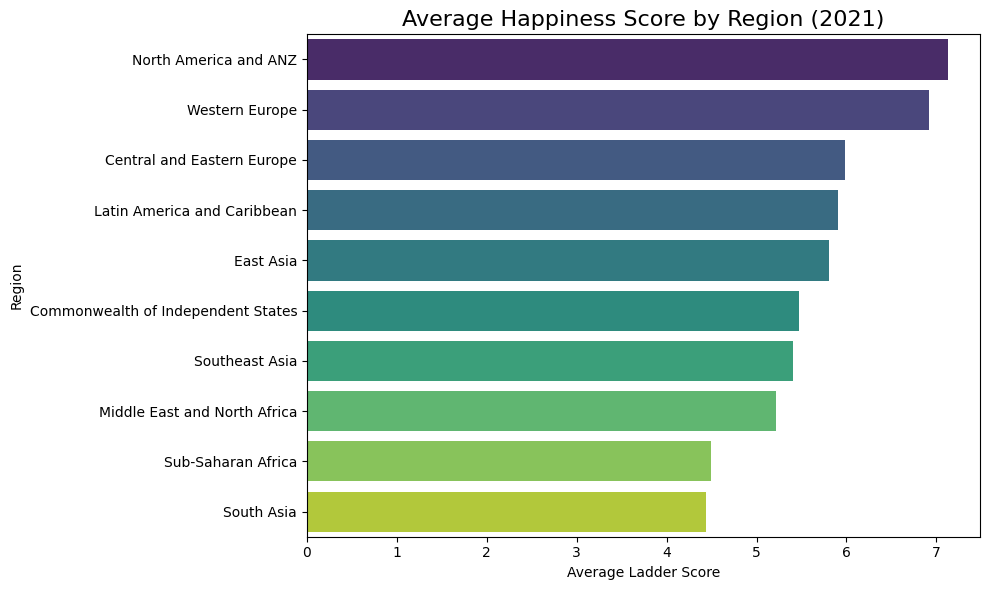

In [10]:
# Hitung rata-rata per wilayah
region_happiness = df.groupby('Regional indicator')['Ladder score'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=region_happiness.values,
    y=region_happiness.index,
    hue=region_happiness.index, 
    palette='viridis',
    dodge=False,
    legend=False 
)
plt.title('Average Happiness Score by Region (2021)', fontsize=16)
plt.xlabel('Average Ladder Score')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

## 🔍 Faktor yang Paling Mempengaruhi Kebahagiaan

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


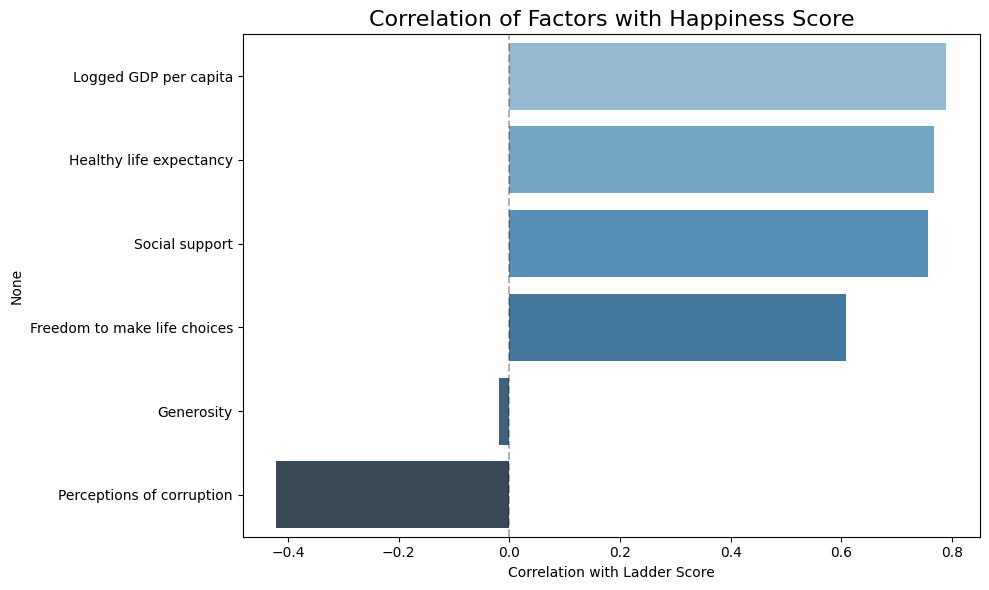

In [12]:
# Pilih kolom faktor utama
factors = [
    'Logged GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

# Hitung korelasi dengan 'Ladder score'
corr = df[['Ladder score'] + factors].corr()['Ladder score'][1:].sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=corr.values,
    y=corr.index,
    hue=corr.index,
    palette='Blues_d',
    dodge=False,
    legend=False
)
plt.title('Correlation of Factors with Happiness Score', fontsize=16)
plt.xlabel('Correlation with Ladder Score')
plt.axvline(0, color='k', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

> **Insight**: Dukungan sosial (`Social support`) dan harapan hidup sehat (`Healthy life expectancy`) memiliki korelasi paling kuat dengan skor kebahagiaan — lebih tinggi daripada GDP per kapita. Ini menunjukkan bahwa **kualitas hubungan dan kesehatan** lebih penting daripada kekayaan semata.